# KNN Example

For this practice, you will need the following datasets:

- **preprocessed_data.csv**: preprocessed data obtained in `EDA_example.ipynb`.

The main package for machine learning in Python is **scikit-learn**.

Further reading:
- [scikit-learn](https://scikit-learn.org) (Machine Learning libraries)

In addition, we will be using the following libraries:
- Data management
    - [numpy](https://numpy.org/) (linear algebra)
    - [pandas](https://pandas.pydata.org/) (data processing, CSV file)

- Plotting
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)

In [46]:
# Import necessary modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Interactive plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

### 1. Our data

#### Load data

In [3]:
df = pd.read_csv('data/preprocessed_data.csv', sep = ",")

#### Encode target
For our ease, we will code the target variable.

In [5]:
df.replace({'Y': {"NO": 0, "YES": 1}}, inplace = True)

### 2. Split data intro train/test

#### Define feature and target matrix

In [7]:
features = list(df.columns)
target = 'Y'
features.remove(target)

In [8]:
X = df[features]
y = df[target]

#### Split
Based on [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) create X_train,X_test,y_train and y_test where:
- test_size = 0.2 (percentage of test data)
- random_state = 0 (seed for replication)
- stratify = target name (Preserves distribution of y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)   

#### Plot distributions

Our sets have been separated in a random and stratified way. A good practice is to check the distribution of both sets.

Text(0.5, 1.0, 'Training set')

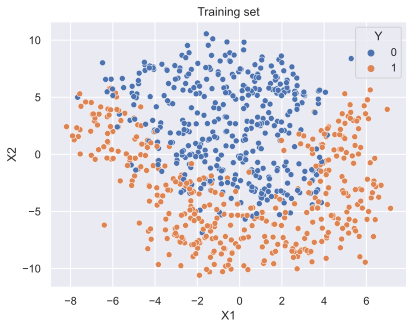

In [11]:
# train set
sns.scatterplot(x = 'X1', y = 'X2', hue = y_train, data = X_train).set_title("Training set")

Text(0.5, 1.0, 'Test set')

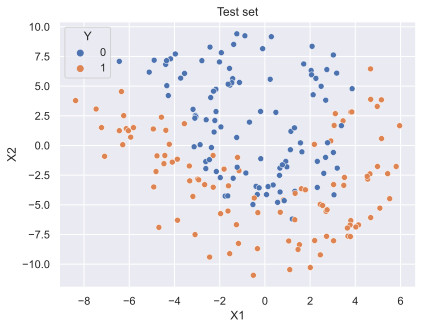

In [12]:
# test set
sns.scatterplot(x = 'X1', y = 'X2', hue = y_test, data = X_test).set_title("Test set")

### 3. Training Machine Learning Models 

#### Scale data

[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

As we have seen in theory, KNN needs homogeneous data, therefore we need to scale the data. We use `StandardScaler` transformer.

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [16]:
X_train

array([[ 0.09541403, -1.02668473],
       [ 1.07503322,  0.81677634],
       [ 0.51787025, -1.17249415],
       ...,
       [-0.68054028, -0.4440001 ],
       [-0.83586701,  1.39418221],
       [ 0.8401913 ,  1.27891635]])

#### Train the simplest model

Our first model, `n_neighbors=1` and `metric = 'euclidean'`

In [19]:
# Instantiate:
model = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')

# train model
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

#### Understanding the distances

In [23]:
new_point = [[-0.4,2]]

model.kneighbors(new_point)

(array([[0.0176777]]), array([[10]]))

It returns [[0.0176777]], and [[10]], which means that the element is at distance 0.0176777 and is the tenth element of samples.

In [21]:
X_train[10]

array([-0.38356199,  1.9934967 ])

#### Train better model

Last model was very simple, our new model has `n_neighbors = 5` and `metric = 'euclidea'`

In [24]:
# Instantiate:
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

# train model
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

#### Predictions

We will evaluate our model on the test set. We have to apply the same transformations to both the train and the test.

In [25]:
# Scaling test
X_test = sc.transform(X_test)

In [30]:
# prediction classes
y_pred = model.predict(X_test)

# prediction probabilities
y_pred_proba = model.predict_proba(X_test)

In [31]:
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [32]:
y_pred_proba[0:5]

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ]])

#### Performance metrics

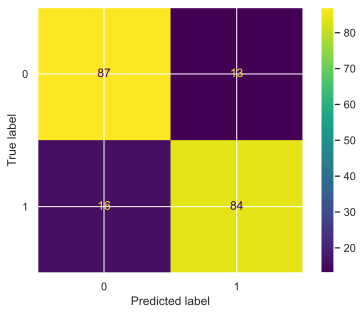

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [43]:
print("RECALL 1")
print(84/(16+84))
print("RECALL 0")
print(87/(87+13))

RECALL 1
0.84
RECALL 0
0.87


In [41]:
print(classification_report(y_test, y_pred, target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.84      0.87      0.86       100
           0       0.87      0.84      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



model KNN - 5 AUC score: 0.9392999999999999


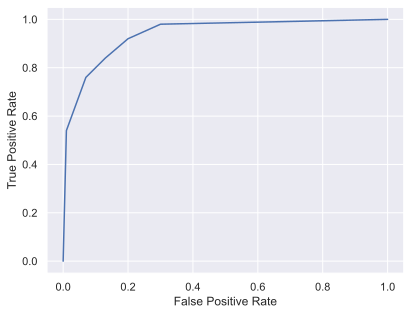

In [50]:
# Roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'model KNN - 5 AUC score: {roc_auc_score(y_test, y_pred_proba[:,1])}')

#### Understanding probabilities

In [74]:
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns = ["pred_0","pred_1"])
y_pred_proba_df["y_pred"] = y_pred
y_pred_proba_df["y_test"] = list(y_test)

In [76]:
y_pred_proba_df.head(5)

,pred_0,pred_1,y_pred,y_test
0,1.0,0.0,0,0
1,0.8,0.2,0,1
2,1.0,0.0,0,0
3,0.2,0.8,1,1
4,0.0,1.0,1,1


Text(0.5, 1.0, 'Probability distribution of classes')

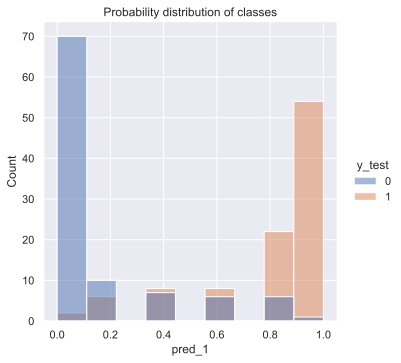

In [79]:
sns.displot(y_pred_proba_df[["pred_1","y_test"]], x="pred_1", hue="y_test")
plt.title("Probability distribution of classes")

#### Optimal n_neighbors

Maximum ROC: 0.8849999999999999 at K = 31


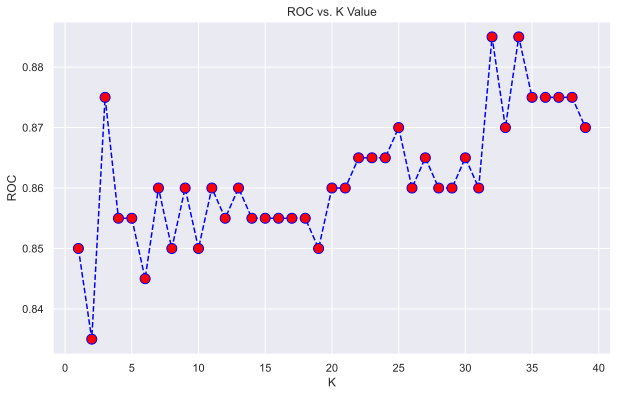

In [84]:
# Euclidean
roc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = "euclidean").fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    roc.append(roc_auc_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),roc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('ROC vs. K Value')
plt.xlabel('K')
plt.ylabel('ROC')
print("Maximum ROC:",max(roc),"at K =",roc.index(max(roc)))

Maximum ROC: 0.885 at K = 2


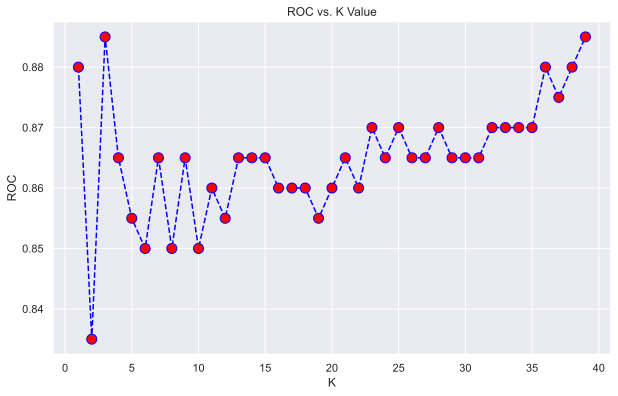

In [87]:
# Manhattan
roc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = "manhattan").fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    roc.append(roc_auc_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),roc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('ROC vs. K Value')
plt.xlabel('K')
plt.ylabel('ROC')
print("Maximum ROC:",max(roc),"at K =",roc.index(max(roc)))

#### Training with K - optimum

model KNN - 5 AUC score: 0.95405


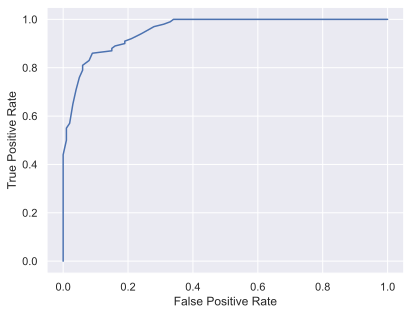

In [88]:
# Instantiate:
model = KNeighborsClassifier(n_neighbors = 31, metric = 'euclidean')

# train model
model.fit(X_train,y_train)

# test has already scaled
# prediction classes 
y_pred = model.predict(X_test)

# prediction probabilities
y_pred_proba = model.predict_proba(X_test)

#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'model KNN - 5 AUC score: {roc_auc_score(y_test, y_pred_proba[:,1])}')
